# Twitter Scraper: Tweepy y Pandas dataframe
## Técnicas de Modelado Semántico en la Web - 
### Guerra en Ucrania - Twitter scraping

In [1]:
#Intalación de librerias
%pip install tweepy
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rockb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rockb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rockb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
#Imports
import tweepy
import pandas as pd
import time
import os

In [2]:
#Credentials
consumer_key = "59h44Sc9uN1ueZQi70UJGbFlj"
consumer_secret = "Z2b2pf9kvT2TUw7sHvTq2Qnw1KrAujSe3ZIJOzycPsF8LeHUDA"
access_token = "2643285261-LNEJiHffpIUSJtqWPCPa4eWWAFQmN1QhqApHSkx"
access_token_secret = "vVCZxSqvN5btApcvA9oktbnHBak9cbCCgIcSog8Dpa8Sh"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Parte 1: toma de contacto Twitter API
### Búsqueda tweets en base a un usuario en concreto

In [ ]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAPK4cQEAAAAAm%2B6rariKgLqewpB%2B9TEEYa3sIr0%3DFkF7GQ9UusNeVeZTRwNCVAUgOsZaUUSen3jzq28TQlZG3Bn1OT')
query = 'from:elonmusk -is:retweet'

# From the Twitter handle "elonmusk" and we are excluding retweets using -is:retweet
# Additional Tweet fields such as "context_annotations" or "created_at": ,tweet_fields=['context_annotations', 'created_at'],
tweets = client.search_recent_tweets(query=query, max_results=100)

for tweet in tweets.data:
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)

### Búsqueda de tweets en base a una sentencia

In [3]:
tweets = []

def text_query_to_csv(text_query,count):
    try:
        # Creation of query method using parameters
        tweets = tweepy.Cursor(api.search_tweets,
                               q=text_query, 
                               lang='en OR es').items(count)

        # Pulling information from tweets iterable object
        # relation = tweet.is_quoted_status tweet.retweet.status
        tweets_list = [[tweet.created_at, tweet.id, tweet.user.name, tweet.user.followers_count, tweet.source, tweet.text] for tweet in tweets]
        
        # Creation of dataframe from tweets list
        # Add or remove columns as you remove tweet information
        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Name', 'Followers', 'Source', 'Text'])

        # Converting dataframe to CSV 
        tweets_df.to_csv('UkraineWarTweets.csv'.format(text_query), mode='a+', sep=',', index = False)

    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)
        
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
text_query = '"Ukranian war" OR "Russian army" OR Donbas OR Crimea OR Kiev OR Zelensky OR Putin OR NATO OR OTAN -is:retweet'
count = 400

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

# Parte 2: preprocesamiento y limpieza de datos

In [4]:
data1_0 = pd.read_csv('UkraineWarTweets.csv', encoding='utf8', sep=",", header = None, error_bad_lines=False)

def pre_df(data):
    data.columns = ['Datetime', 'Tweet Id', 'Name', 'Followers', 'Source', 'Text']
    
pre_df(data1_0)
"""    
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300
"""  
data_tot = pd.concat(
    [data1_0],
    axis=0,
    join="outer",
    ignore_index=True,
    copy=True
)

data_tot.shape

C:\Users\rockb\AppData\Local\Temp\ipykernel_3280\3687665488.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1_0 = pd.read_csv('UkraineWarTweets.csv', encoding='utf8', sep=",", header = None, error_bad_lines=False)
b'Skipping line 837: expected 6 fields, saw 7\nSkipping line 838: expected 6 fields, saw 7\nSkipping line 839: expected 6 fields, saw 7\nSkipping line 840: expected 6 fields, saw 7\nSkipping line 841: expected 6 fields, saw 7\nSkipping line 842: expected 6 fields, saw 7\nSkipping line 843: expected 6 fields, saw 7\nSkipping line 844: expected 6 fields, saw 7\nSkipping line 845: expected 6 fields, saw 7\nSkipping line 846: expected 6 fields, saw 7\nSkipping line 847: expected 6 fields, saw 7\n'


(2902, 6)

In [5]:
#Ordenamos por "Source", la segunda columna es "Text" (el tweet en sí mismo)
data_tot.groupby('Source')['Text'].count()

Source
@ImaSmash23412                 1
Bot Libre!                     1
Buffer                         1
Cheap Bots, Done Quick!        1
CobeDot                        1
Dailyscope.net                 1
DopeyUncle2                    2
Drone_Bot                      1
Echobox                        4
Echofon                        1
Hootsuite Inc.                 1
IFTTT                         20
IdeallyaNews                   1
LaterMedia                     1
LinkedIn                       1
Microsoft Power Platform       2
Nowmy Tweets                   1
OxfordBlue-Twitter             2
Revive Social App              4
SkyNetDev1                     1
SocialFlow                     5
Source                        12
The Fuck Putin Bot             3
Tiana1                         1
TopazBots.com                  1
True Anthem                    1
TweetCaster for Android        3
TweetDeck                     24
TweetDeck Web App              2
Tweetbot for Mac               1
Twe

In [10]:
#Limpiamos los tweets que no deseamos, como errores o los tweets generados por bots
data_tot_cl = data_tot.query('Source != "Source" and Source != "veilleeuroatl" and Source != "Nowmy Tweets" \
and Source != "Tweetbot for iΟS" and Source != "The Fuck Putin Bot" and Source != "dlvr.it" and Source !="DopeyUncle2" \
and Source != "Cheap Bots, Done Quick!" and Source != "IdeallyaNews" and Source != "TopazBots.com" \
and Source != "Tweetbot for Mac" and Source != "CobeDot" and Source != "Echobox" and Source ! = "True Anthem" \
and Source != "Drone_Bot" and Source != "Dailyscope.net" and Source != "Bot Libre!" and Source != "Buffer" \
and Source != "cmssocialservice" and Source != "ua_dashboard_bot"')

#Comprobamos todo ha ido bien
data_tot_cl.groupby('Source')['Text'].count()

Source
IFTTT                        20
LaterMedia                    1
Microsoft Power Platform      2
Revive Social App             3
SkyNetDev1                    1
SocialFlow                    4
TweetCaster for Android       3
TweetDeck                    17
Twidere for Android           1
Twitter Web App             610
Twitter for Android         762
Twitter for Mac               2
Twitter for iPad             87
Twitter for iPhone          535
Twitterrific for iOS          2
WordPress.com                11
Name: Text, dtype: int64

In [6]:
#Observamos parte de los tweets recopilados
data_tot.groupby('Text')['Text'].count()

Text
"'De entrada, no' fue el eslogan ambiguo con q el PSOE saludó hace cuarenta años el ingreso d España en la OTAN, [.… https://t.co/u74iaKYQyF          1
"A major nuclear power is behaving as if it has the right to redraw borders. Putin wants a return to a world order… https://t.co/cLnabQAXuJ           1
"Crimea is ours. Our Ukrainian. And they (the Americans) know it. Therefore, they will fly to Crimea at a run, if t… https://t.co/A2hBMctl11          1
"For NATO, Turkey Is a Disruptive Ally" by Michael Crowley and Steven Erlanger via NYT https://t.co/nQOYYqwFyQ https://t.co/Fsir64XBf4                1
"If we are going to peddle such caveman nationalism, pour dirt on representatives of other ethnicities, we will bre… https://t.co/w3DJ2u9NXi          1
                                                                                                                                                     ..
🔴Day 100 of special 3 day military operation:\n\n- NATO expanding\n- Ru energy comi

In [7]:
#Eliminamos los retweets
for index, row in data_tot.iterrows():
    if row['Text'].startswith('RT @'):
        data_tot.drop(index, inplace=True)

data_tot_cl=data_tot

In [8]:
#Comprobamos el tamaño del dataframe
print('El tamaño del dataframe es de:',data_tot_cl.shape, 'filas y columnas')

El tamaño del dataframe es de: (864, 6) filas y columnas


In [9]:
dateGroup = data_tot_cl.groupby(['Datetime'], as_index = False).size()
print(dateGroup,"\n")

dateMaximo = dateGroup.loc[pd.to_datetime(dateGroup['Datetime'], errors='coerce').idxmax()]
print("Fecha más tardía: ",dateMaximo['Datetime'],"\n")
dateMinimo = dateGroup.loc[pd.to_datetime(dateGroup['Datetime'], errors='coerce').idxmin()]
print("Fecha más temprana: ",dateMinimo['Datetime'])

                      Datetime  size
0    2022-05-18 14:22:18+00:00     1
1    2022-05-18 14:22:20+00:00     1
2    2022-05-18 14:22:21+00:00     1
3    2022-05-18 14:22:39+00:00     3
4    2022-05-18 14:22:41+00:00     1
..                         ...   ...
576  2022-06-03 06:23:04+00:00     2
577  2022-06-03 06:23:05+00:00     2
578  2022-06-03 06:23:08+00:00     3
579  2022-06-03 06:23:10+00:00     1
580                   Datetime    12

[581 rows x 2 columns] 

Fecha más tardía:  2022-06-03 06:23:10+00:00 

Fecha más temprana:  2022-05-18 14:22:18+00:00


In [10]:
#Ver distintos usuarios (ya limpios los datos)
print("Total usuarios distintos: ",data_tot_cl.groupby('Name')['Text'].count().count())

Total usuarios distintos:  794


In [11]:
print("Total usuarios distintos y número de tweets: \n\n",data_tot_cl.groupby('Name')['Text'].count())

Total usuarios distintos y número de tweets: 

 Name
#EyesightToTheBlind                     1
(((Matt Boxer)))#СлаваУкраїні! 🇺🇸🥁🇺🇦    1
-':,,                                   1
-- GEROMAN -- 👀 -                       1
.                                       2
                                       ..
💙💛 Eriction 💉💉💉💉                        1
💫                                       1
🔞 zuzu 🚀                                1
🥁🥁🥁🥁Here's Chip! 🥁☮🌈🛠                   1
🦋                                       1
Name: Text, Length: 794, dtype: int64


### Visualización de los datos mediante gráficos

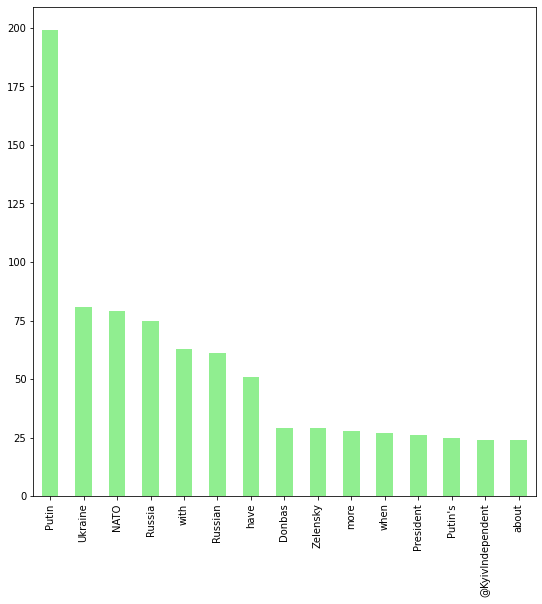

<AxesSubplot:ylabel='Palabra'>

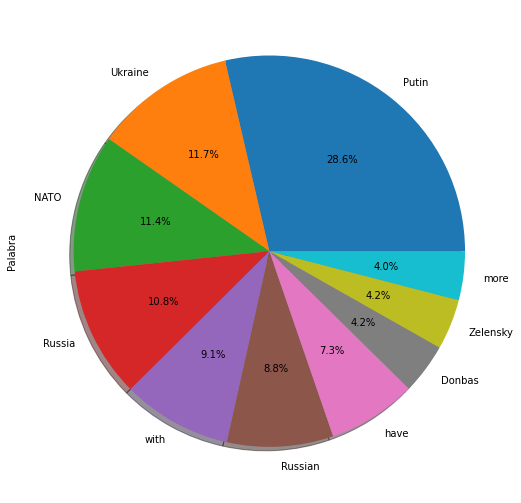

In [12]:
import matplotlib.pyplot as plt

#Guardar palabras de los tweets en un dataframe
data_tot_cl['Palabras'] = data_tot_cl['Text'].apply(lambda x: x.split())

#Crear dataframe con palabras unicas 
palabras_df = data_tot_cl['Palabras'].apply(pd.Series).stack().reset_index(level=1, drop=True)
palabras_df.name = 'Palabra'
palabras_df = palabras_df.value_counts()

#Eliminar palabras de menos de 3 caracteres
palabras_df = palabras_df[palabras_df.index.str.len() > 3]

#Eliminamos palabras no deseadas
palabras_df = palabras_df.drop(['will','they','this','that','from','just'])

#Grafico de las palabras mas usadas
palabras_df[:15].plot(kind='bar', color='lightgreen', figsize=(9,9))
plt.show()
print()
palabras_df[:10].plot(kind='pie', shadow=True, autopct='%0.1f%%', figsize=(9,9))

In [13]:
#Guardar dataframe con palabras unicas en un csv
palabras_df.to_csv('palabras_df.csv', sep=',', index = True)

print("Total palabras distintas: ",palabras_df.count(),"\n")

print("Visualización palabras distintas:\n",palabras_df)

Total palabras distintas:  5873 

Visualización palabras distintas:
 Putin                      199
Ukraine                     81
NATO                        79
Russia                      75
with                        63
                          ... 
live!                        1
pistol                       1
Journeyman                   1
https://t.co/e3KVkIIpNV      1
https://t.co/IheB3UYF0f      1
Name: Palabra, Length: 5873, dtype: int64
